In [28]:
# Célula 1: Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # Para lidar com caminhos de arquivos

# Configurações de exibição para melhor visualização (opcional)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Definir os caminhos das pastas (usando caminhos relativos é uma boa prática)
# O notebook está em 'notebook/', o CSV em 'dados/', as imagens em 'imagens/'
# O ".." significa "voltar um diretório"
caminho_dados = '../dados/cedn_boa_vista_2024.csv'
caminho_imagens = '../imagens/'

print(f"Caminho do CSV: {caminho_dados}")
print(f"Caminho das Imagens: {caminho_imagens}")

Caminho do CSV: ../dados/cedn_boa_vista_2024.csv
Caminho das Imagens: ../imagens/


In [30]:
# Célula 2: Carregar o arquivo CSV (tentativa com latin1)
try:
    df = pd.read_csv(caminho_dados, encoding='latin1')
    print("CSV carregado com sucesso com encoding='latin1'!")
except UnicodeDecodeError:
    print(f"Erro: 'latin1' encoding não funcionou. Tentando outra codificação...")
except FileNotFoundError:
    print(f"Erro: O arquivo CSV não foi encontrado em {caminho_dados}. Verifique o caminho.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Ocorreu um erro inesperado: Error tokenizing data. C error: Expected 2 fields in line 14, saw 3



In [31]:
# Célula 2: Carregar o arquivo CSV (tentativa com cp1252)
try:
    df = pd.read_csv(caminho_dados, encoding='cp1252')
    print("CSV carregado com sucesso com encoding='cp1252'!")
except UnicodeDecodeError:
    print(f"Erro: 'cp1252' encoding não funcionou. O arquivo pode ter outra codificação ou estar corrompido.")
except FileNotFoundError:
    print(f"Erro: O arquivo CSV não foi encontrado em {caminho_dados}. Verifique o caminho.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Ocorreu um erro inesperado: Error tokenizing data. C error: Expected 2 fields in line 14, saw 3



In [32]:
# Célula 2: Carregar o arquivo CSV (tentativa com ; e latin1)
try:
    # Primeiro, tentar com o separador correto e a codificação que funcionou (ou latin1 como ponto de partida)
    df = pd.read_csv(caminho_dados, encoding='latin1', sep=';') # OU encoding='cp1252'
    print("CSV carregado com sucesso com encoding e separador corrigidos!")
except UnicodeDecodeError:
    print(f"Erro: Problema de codificação novamente. Tente 'cp1252' ou verifique a codificação real do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o CSV. Detalhes: {e}")
    print("Verifique se o separador (sep=';') e a codificação (encoding='latin1') estão corretos.")
    print("Também inspecione a linha 14 (ou próxima) do seu CSV.")

CSV carregado com sucesso com encoding e separador corrigidos!


In [33]:
import csv # Adicione esta linha no topo, junto com os outros imports

# Célula 2: Carregar o arquivo CSV (tentativa com ; e latin1 e tratamento de aspas)
try:
    df = pd.read_csv(
        caminho_dados,
        encoding='latin1', # ou 'cp1252'
        sep=';',           # ou o separador correto
        quotechar='"',
        quoting=csv.QUOTE_MINIMAL # Usar se o separador estiver dentro de campos e não estiverem bem quotados
    )
    print("CSV carregado com sucesso com encoding, separador e tratamento de aspas!")
except UnicodeDecodeError:
    print(f"Erro: Problema de codificação. Tente 'cp1252' ou verifique a codificação real do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o CSV. Detalhes: {e}")
    print("Verifique os parâmetros 'sep', 'encoding', 'quotechar' e 'quoting'.")
    print("Inspecione a linha 14 (ou próxima) do seu CSV para malformação.")

CSV carregado com sucesso com encoding, separador e tratamento de aspas!


In [34]:
# Célula 2: Carregar o arquivo CSV (tentativa com pular linhas problemáticas)
try:
    df = pd.read_csv(
        caminho_dados,
        encoding='latin1', # ou 'cp1252'
        sep=';',           # ou o separador correto
        on_bad_lines='skip' # <--- Adicione esta linha
    )
    print("CSV carregado (algumas linhas problemáticas podem ter sido ignoradas).")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o CSV mesmo com 'on_bad_lines=skip'. Detalhes: {e}")
    print("O arquivo pode estar seriamente corrompido ou o separador ainda está incorreto.")

CSV carregado (algumas linhas problemáticas podem ter sido ignoradas).


In [35]:
# Célula: Verifique o formato do DataFrame (linhas, colunas)
print("Formato do DataFrame (linhas, colunas):", df.shape)

# Célula: Verifique as primeiras linhas para garantir que os dados estão como esperado
print("\nPrimeiras 5 linhas do DataFrame (após carregamento):")
print(df.head())

# Célula: Informações gerais e tipos de dados
print("\nInformações do DataFrame (após carregamento):")
df.info()

# Célula: Verifique novamente os valores ausentes (agora no DataFrame carregado)
print("\nValores ausentes por coluna (após carregamento):")
print(df.isnull().sum())

Formato do DataFrame (linhas, colunas): (13, 2)

Primeiras 5 linhas do DataFrame (após carregamento):
                                Título da Palestra\t                          Palestrante
0  Parcerias Estratégicas entre a CAPES, o Minist...  Prof. Dra. Denise Pires de Carvalho
1            Palestra do Comando Militar da Amazônia                                  NaN
2                                  Operação Acolhida      Gen Div Helder de Freitas Braga
3   Agências Internacionais e a resposta humanitária                                  NaN
4  A situação atual da migração e do refúgio na f...    Prof. Dr. João Jarochinski - UFRR

Informações do DataFrame (após carregamento):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Título da Palestra	  13 non-null     object
 1   Palestrante          11 non-null     object
dtypes: objec

In [36]:
# Célula 1.1: Visualizar as primeiras e últimas linhas
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

print("\nÚltimas 5 linhas do DataFrame:")
print(df.tail())

# Célula 1.2: Obter informações gerais sobre o DataFrame (tipos de dados, não-nulos)
print("\nInformações do DataFrame:")
df.info()

# Célula 1.3: Obter estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas de colunas numéricas:")
print(df.describe())

# Célula 1.4: Obter estatísticas descritivas para colunas não numéricas (categóricas/objetos)
print("\nEstatísticas descritivas de colunas não-numéricas:")
print(df.describe(include='object'))

# Célula 1.5: Verificar a contagem de valores ausentes por coluna novamente
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Opcional: Visualizar a porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes:")
print((df.isnull().sum() / len(df)) * 100)

Primeiras 5 linhas do DataFrame:
                                Título da Palestra\t                          Palestrante
0  Parcerias Estratégicas entre a CAPES, o Minist...  Prof. Dra. Denise Pires de Carvalho
1            Palestra do Comando Militar da Amazônia                                  NaN
2                                  Operação Acolhida      Gen Div Helder de Freitas Braga
3   Agências Internacionais e a resposta humanitária                                  NaN
4  A situação atual da migração e do refúgio na f...    Prof. Dr. João Jarochinski - UFRR

Últimas 5 linhas do DataFrame:
                                 Título da Palestra\t                              Palestrante
8                                      Defesa e Saúde       Representante da Marinha do Brasil
9                                      Defesa e Saúde  Representante da Força Aérea Brasileira
10                                     Defesa e Saúde     Representante do Exército Brasileiro
11      Combate

In [37]:
# Célula 2.1: Exemplo de conversão de tipo de dado (se uma coluna for 'object' mas deveria ser numérica)
# Substitua 'Nome_Da_Coluna_Numerica_Texto' pelo nome real de uma coluna que precise de conversão.
# Exemplo: df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')
# 'errors='coerce'' vai transformar valores que não podem ser convertidos em NaN (Not a Number)

# Exemplo de conversão para data (se uma coluna for 'object' mas deveria ser data)
# Substitua 'Nome_Da_Coluna_Data' pelo nome real de uma coluna de data.
# df['Nome_Da_Coluna_Data'] = pd.to_datetime(df['Nome_Da_Coluna_Data'], errors='coerce')

In [38]:
# Célula 2.2: Exemplo de tratamento de valores ausentes (preencher com a média/mediana para numéricas)
# Substitua 'Nome_Da_Coluna_Numerica' pela coluna que você quer preencher.
# df['Nome_Da_Coluna_Numerica'].fillna(df['Nome_Da_Coluna_Numerica'].mean(), inplace=True)
# Ou preencher com um valor específico para categóricas
# df['Nome_Da_Coluna_Categorica'].fillna('Desconhecido', inplace=True)

# Ou, se for razoável, remover linhas com valores ausentes em colunas específicas
# df.dropna(subset=['Coluna_Critica_1', 'Coluna_Critica_2'], inplace=True)

# Após qualquer tratamento, re-verifique os valores ausentes
print("\nValores ausentes por coluna (após tratamento):")
print(df.isnull().sum())


Valores ausentes por coluna (após tratamento):
Título da Palestra\t    0
Palestrante             2
dtype: int64


In [39]:
# Célula 3.1: Exemplo: Contagem de valores únicos para uma coluna categórica
# Substitua 'Nome_Da_Coluna_Categorica_1' e 'Nome_Da_Coluna_Categorica_2'
print("\nContagem de valores para 'Nome_Da_Coluna_Categorica_1':")
print(df['Nome_Da_Coluna_Categorica_1'].value_counts())

print("\nContagem de valores para 'Nome_Da_Coluna_Categorica_2':")
print(df['Nome_Da_Coluna_Categorica_2'].value_counts(normalize=True)) # Mostra porcentagem


Contagem de valores para 'Nome_Da_Coluna_Categorica_1':


KeyError: 'Nome_Da_Coluna_Categorica_1'

In [40]:

# Célula: Ver os nomes das colunas do seu DataFrame
print(df.columns)


Index(['Título da Palestra\t', 'Palestrante'], dtype='object')


In [42]:
# Célula 1: Limpar os nomes das colunas
# Remove espaços em branco extras (incluindo '\t') do início/fim dos nomes das colunas
df.columns = df.columns.str.strip()

# Verifique os nomes das colunas novamente para confirmar a limpeza
print("Novos nomes das colunas após a limpeza:")
print(df.columns)

Novos nomes das colunas após a limpeza:
Index(['Título da Palestra', 'Palestrante'], dtype='object')


In [43]:
# Célula 2.1.1: Contagem de valores únicos para 'Título da Palestra'
print("\nContagem de palestras:")
# Mostra as palestras mais frequentes
print(df['Título da Palestra'].value_counts())

print("\nPorcentagem de palestras:")
# Mostra a porcentagem de cada palestra
print(df['Título da Palestra'].value_counts(normalize=True) * 100)


Contagem de palestras:
Título da Palestra
Defesa e Saúde                                                                      3
Parcerias Estratégicas entre a CAPES, o Ministério da Defesa e pesquisas na área    1
Palestra do Comando Militar da Amazônia                                             1
Operação Acolhida                                                                   1
Agências Internacionais e a resposta humanitária                                    1
A situação atual da migração e do refúgio na fronteira norte                        1
Geopolítica, segurança e defesa da fronteira norte da Amazônia                      1
Os tensionamentos geopolíticos no Planalto das Guianas                              1
Operações integradas de segurança e defesa na Amazônia                              1
Combate ao crime ambiental na fronteira norte                                       1
Temas socioambientais, desenvolvimento, segurança e defesa                          1
Name: count

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7272\462283431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Título da Palestra', data=df,


Gráfico 'titulos_palestras_distribuicao.png' salvo em: ../imagens/titulos_palestras_distribuicao.png


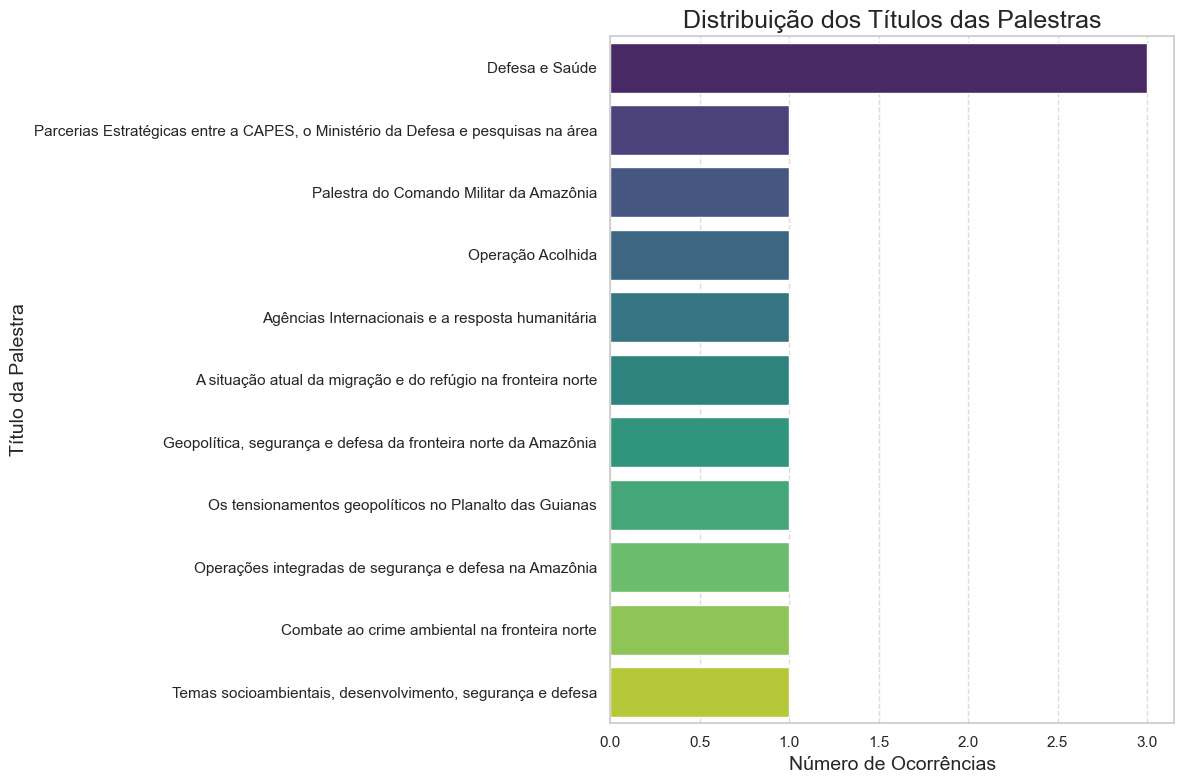

In [44]:
# Célula 2.1.2: Visualização: Gráfico de Barras para 'Título da Palestra'
try:
    plt.figure(figsize=(12, 8))
    # sns.countplot é ótimo para contar ocorrências de categorias
    sns.countplot(y='Título da Palestra', data=df,
                  order=df['Título da Palestra'].value_counts().index,
                  palette='viridis')
    plt.title('Distribuição dos Títulos das Palestras', fontsize=18)
    plt.xlabel('Número de Ocorrências', fontsize=14)
    plt.ylabel('Título da Palestra', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta o layout para evitar cortes de rótulos

    # Salvar o gráfico
    nome_arquivo_grafico = 'titulos_palestras_distribuicao.png'
    caminho_completo_grafico = os.path.join(caminho_imagens, nome_arquivo_grafico)
    plt.savefig(caminho_completo_grafico, bbox_inches='tight')
    print(f"Gráfico '{nome_arquivo_grafico}' salvo em: {caminho_completo_grafico}")
    plt.show()
except Exception as e:
    print(f"Ocorreu um erro ao gerar o gráfico de barras para 'Título da Palestra': {e}")

In [45]:
# Célula 2.2.1: Contagem de valores únicos para 'Palestrante'
print("\nContagem de palestras por Palestrante:")
# Mostra os palestrantes mais ativos
print(df['Palestrante'].value_counts())

print("\nPorcentagem de palestras por Palestrante:")
# Mostra a porcentagem de cada palestrante
print(df['Palestrante'].value_counts(normalize=True) * 100)


Contagem de palestras por Palestrante:
Palestrante
Prof. Dra. Denise Pires de Carvalho         1
Gen Div Helder de Freitas Braga             1
Prof. Dr. João Jarochinski - UFRR           1
Prof. Dr. Cléber Batalha Franklin - UFRR    1
Prof. Dr. Erick Linhares  UFRR - UERR      1
Prof. Dr. Oscar Filho - ESD                 1
Representante da Marinha do Brasil          1
Representante da Força Aérea Brasileira     1
Representante do Exército Brasileiro        1
Prof. Dr. Serguei Camargo - UERR            1
Censipam                                    1
Name: count, dtype: int64

Porcentagem de palestras por Palestrante:
Palestrante
Prof. Dra. Denise Pires de Carvalho         9.090909
Gen Div Helder de Freitas Braga             9.090909
Prof. Dr. João Jarochinski - UFRR           9.090909
Prof. Dr. Cléber Batalha Franklin - UFRR    9.090909
Prof. Dr. Erick Linhares  UFRR - UERR      9.090909
Prof. Dr. Oscar Filho - ESD                 9.090909
Representante da Marinha do Brasil         

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7272\1012076066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Palestrante', data=df,
C:\Users\Administrador\AppData\Local\Temp\ipykernel_7272\1012076066.py:11: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  plt.tight_layout() # Ajusta o layout
C:\Users\Administrador\AppData\Local\Temp\ipykernel_7272\1012076066.py:16: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  plt.savefig(caminho_completo_grafico, bbox_inches='tight')


Gráfico 'palestrantes_distribuicao.png' salvo em: ../imagens/palestrantes_distribuicao.png


C:\Users\Administrador\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


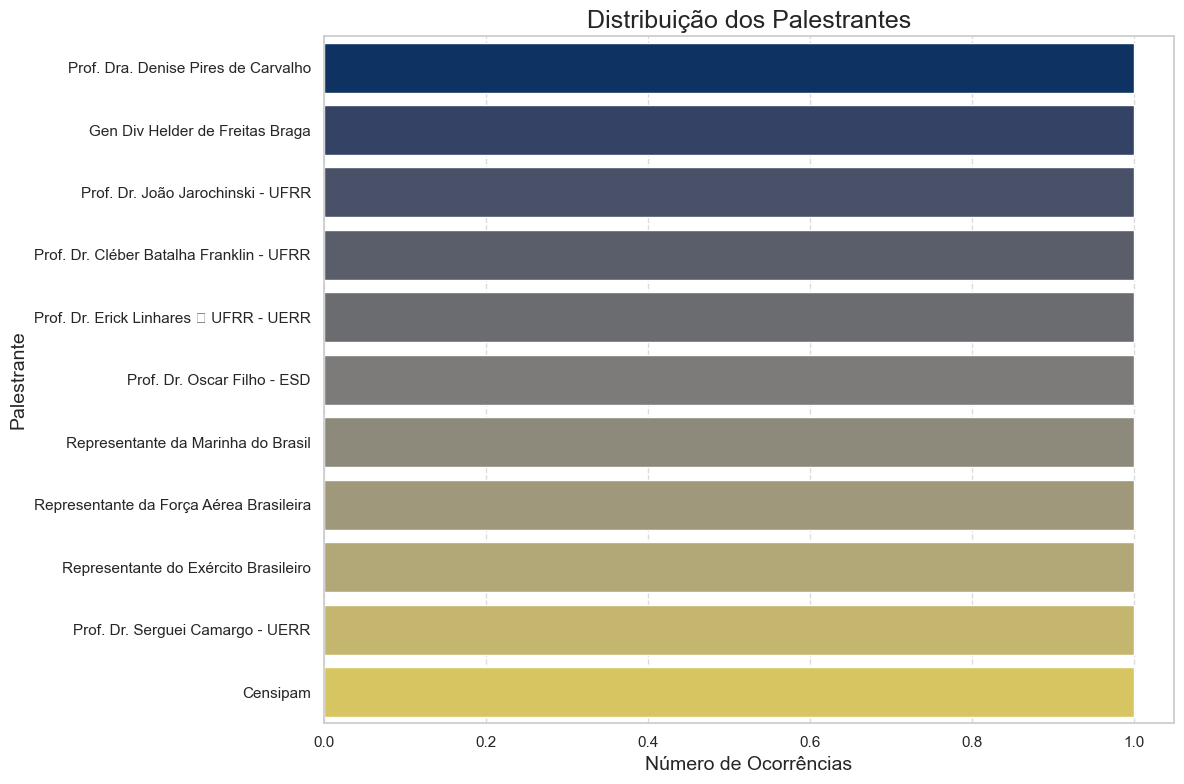

In [46]:
# Célula 2.2.2: Visualização: Gráfico de Barras para 'Palestrante'
try:
    plt.figure(figsize=(12, 8))
    sns.countplot(y='Palestrante', data=df,
                  order=df['Palestrante'].value_counts().index,
                  palette='cividis')
    plt.title('Distribuição dos Palestrantes', fontsize=18)
    plt.xlabel('Número de Ocorrências', fontsize=14)
    plt.ylabel('Palestrante', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta o layout

    # Salvar o gráfico
    nome_arquivo_grafico = 'palestrantes_distribuicao.png'
    caminho_completo_grafico = os.path.join(caminho_imagens, nome_arquivo_grafico)
    plt.savefig(caminho_completo_grafico, bbox_inches='tight')
    print(f"Gráfico '{nome_arquivo_grafico}' salvo em: {caminho_completo_grafico}")
    plt.show()
except Exception as e:
    print(f"Ocorreu um erro ao gerar o gráfico de barras para 'Palestrante': {e}")

In [47]:
# Célula 2.3.1: Tabela de Contingência (Cruzamento de dados)
print("\nCruzamento entre Palestrante e Título da Palestra:")
print(pd.crosstab(df['Palestrante'], df['Título da Palestra']))


Cruzamento entre Palestrante e Título da Palestra:
Título da Palestra                        A situação atual da migração e do refúgio na fronteira norte  Combate ao crime ambiental na fronteira norte  Defesa e Saúde  Geopolítica, segurança e defesa da fronteira norte da Amazônia  Operação Acolhida  Operações integradas de segurança e defesa na Amazônia  Os tensionamentos geopolíticos no Planalto das Guianas  Parcerias Estratégicas entre a CAPES, o Ministério da Defesa e pesquisas na área  Temas socioambientais, desenvolvimento, segurança e defesa
Palestrante                                                                                                                                                                                                                                                                                                                                                                                                                                                  

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\Administrador\AppData\Local\Temp\ipykernel_7272\1521546152.py:14: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  plt.savefig(caminho_completo_grafico, bbox_inches='tight')


Gráfico 'palestrante_titulo_heatmap.png' salvo em: ../imagens/palestrante_titulo_heatmap.png


C:\Users\Administrador\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


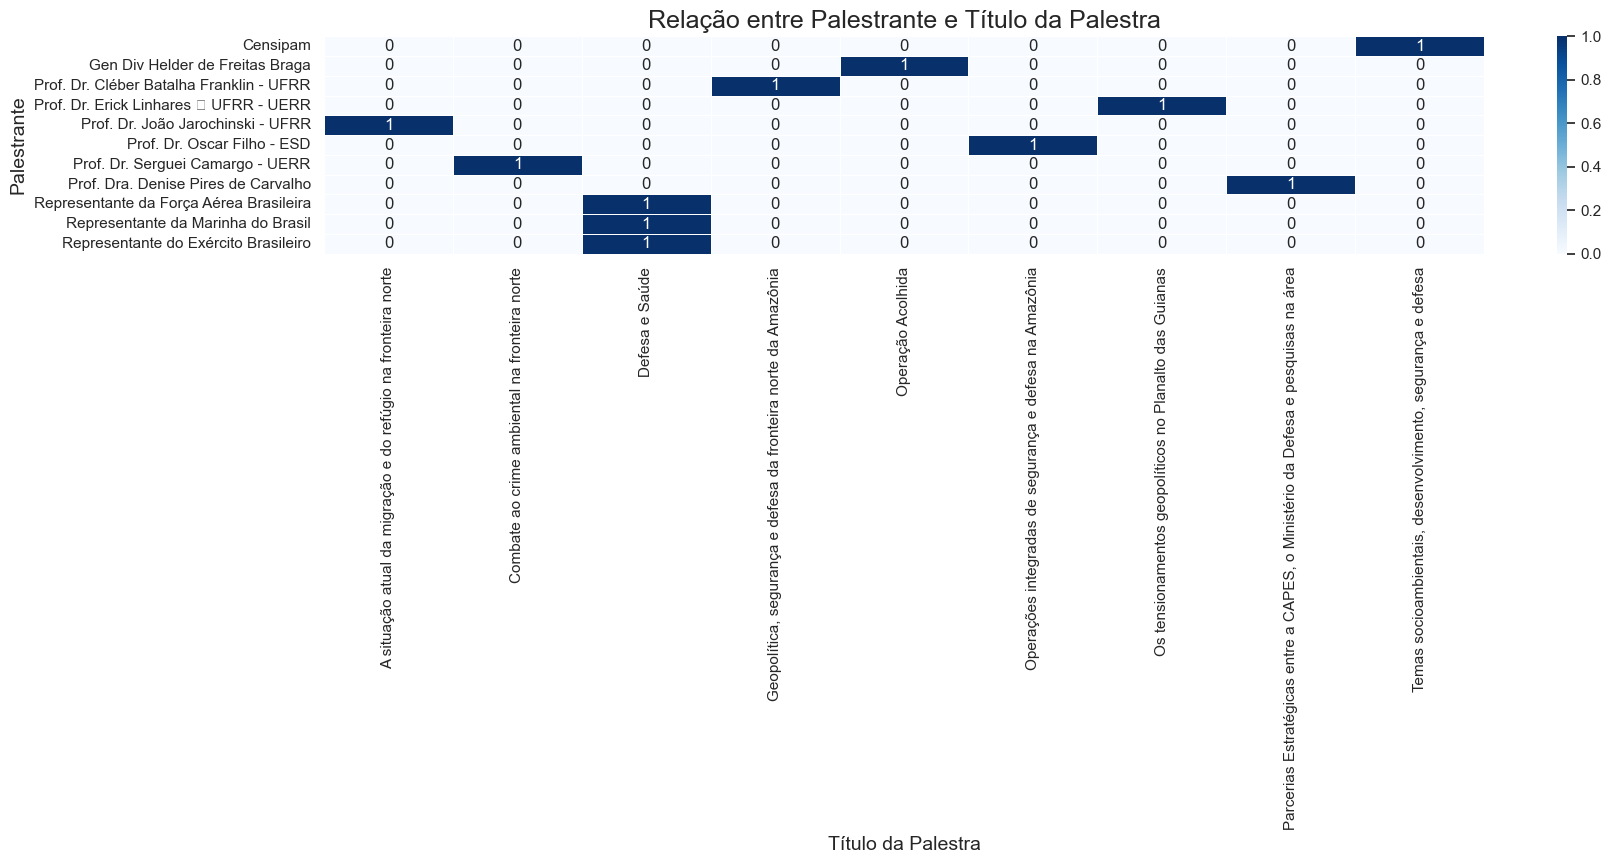

In [48]:
# Célula 2.3.2: Visualização: Heatmap da Tabela de Contingência (se houver muitos dados, pode ficar ilegível)
try:
    crosstab_df = pd.crosstab(df['Palestrante'], df['Título da Palestra'])
    plt.figure(figsize=(max(10, len(crosstab_df.columns)*2), max(8, len(crosstab_df.index)*0.8)))
    sns.heatmap(crosstab_df, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    plt.title('Relação entre Palestrante e Título da Palestra', fontsize=18)
    plt.xlabel('Título da Palestra', fontsize=14)
    plt.ylabel('Palestrante', fontsize=14)
    plt.tight_layout() # Ajusta o layout

    # Salvar o gráfico
    nome_arquivo_grafico = 'palestrante_titulo_heatmap.png'
    caminho_completo_grafico = os.path.join(caminho_imagens, nome_arquivo_grafico)
    plt.savefig(caminho_completo_grafico, bbox_inches='tight')
    print(f"Gráfico '{nome_arquivo_grafico}' salvo em: {caminho_completo_grafico}")
    plt.show()
except Exception as e:
    print(f"Ocorreu um erro ao gerar o heatmap: {e}")

In [49]:
## Resultados Principais

Alguns dos gráficos gerados na análise incluem:

![Distribuição dos Títulos das Palestras](imagens/titulos_palestras_distribuicao.png)

*Insights:* A palestra X foi a mais popular...

![Distribuição dos Palestrantes](imagens/palestrantes_distribuicao.png)

*Insights:* O palestrante Y teve a maior participação...

SyntaxError: invalid syntax (4130876816.py, line 3)